In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [25]:
file_path_athlete_events = "data/athlete_events.csv"
athlete_events_data = pd.read_csv(file_path_athlete_events)

gb_athletes = athlete_events_data[athlete_events_data['NOC'] == 'GBR']
gb_rowing = gb_athletes[gb_athletes['Sport'] == 'Rowing']
gb_cycling = gb_athletes[gb_athletes['Sport'] == 'Cycling']
gb_sailing = gb_athletes[gb_athletes['Sport'] == 'Sailing']
gb_athletics = gb_athletes[gb_athletes['Sport'] == 'Athletics']

medal_trend_rowing = gb_rowing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_cycling = gb_cycling.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_sailing = gb_sailing.dropna(subset=['Medal']).groupby('Year')['Medal'].count()
medal_trend_athletics = gb_athletics.dropna(subset=['Medal']).groupby('Year')['Medal'].count()


medal_trend_df = pd.DataFrame({'Rowing': medal_trend_rowing, 'Cycling': medal_trend_cycling, 'Sailing': medal_trend_sailing, 'Athletics': medal_trend_athletics}).fillna(0) # Lägg till sporter på liknanade sätt i denna för att få in den på det nedanför denna cellen såväl som den samlade px grafen sen
display(medal_trend_df)
# print("Rowing")
# display(medal_trend_rowing.head(3))
# print("\nCycling")
# display(medal_trend_cycling.head(3))

,Rowing,Cycling,Sailing,Athletics
Year,,,,
1896,0.0,2.0,0.0,2
1900,1.0,1.0,14.0,12
1904,0.0,0.0,0.0,2
1906,0.0,6.0,0.0,9
1908,32.0,14.0,37.0,21
1912,24.0,13.0,0.0,22
1920,10.0,9.0,4.0,25
1924,5.0,2.0,5.0,22
1928,16.0,11.0,0.0,8


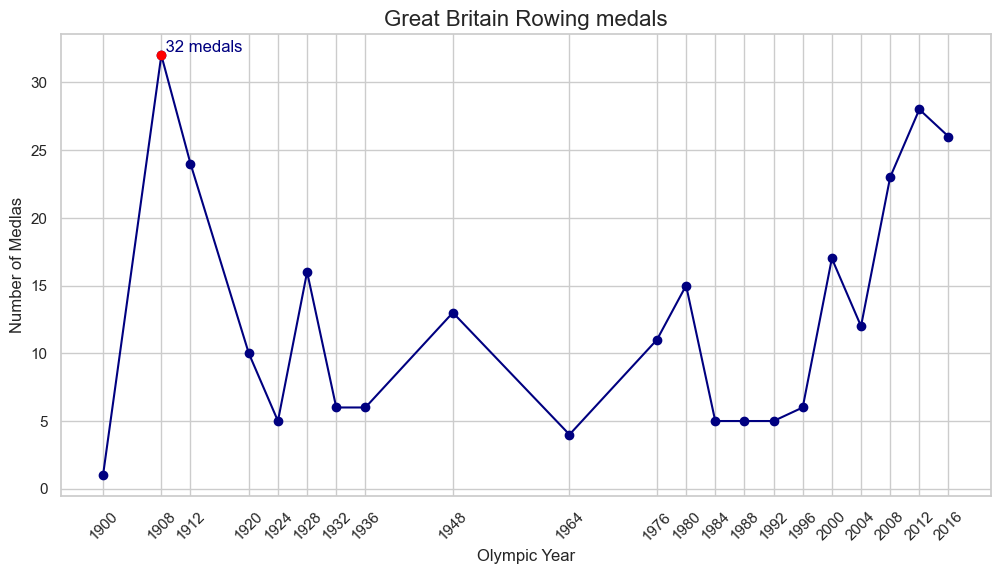

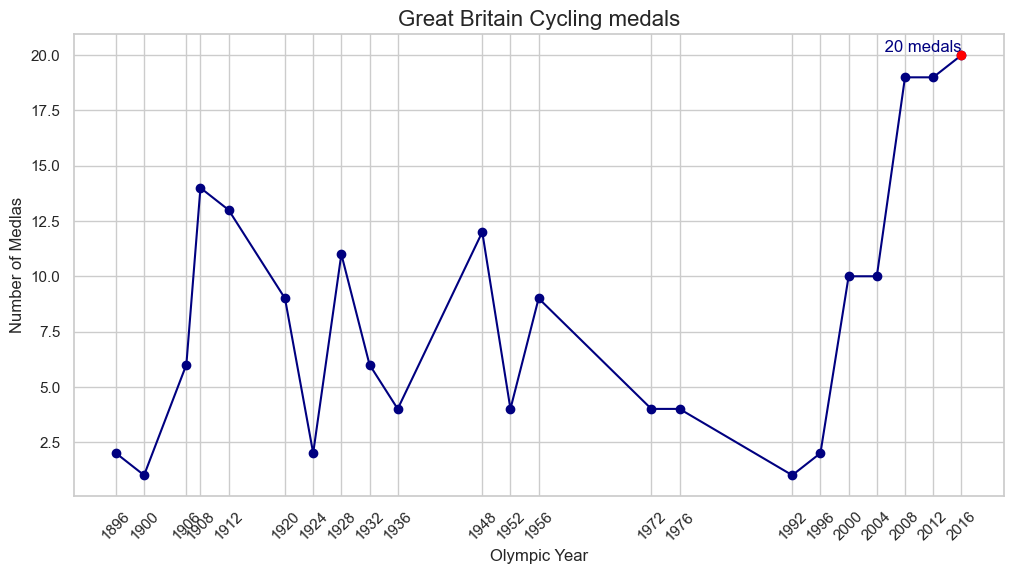

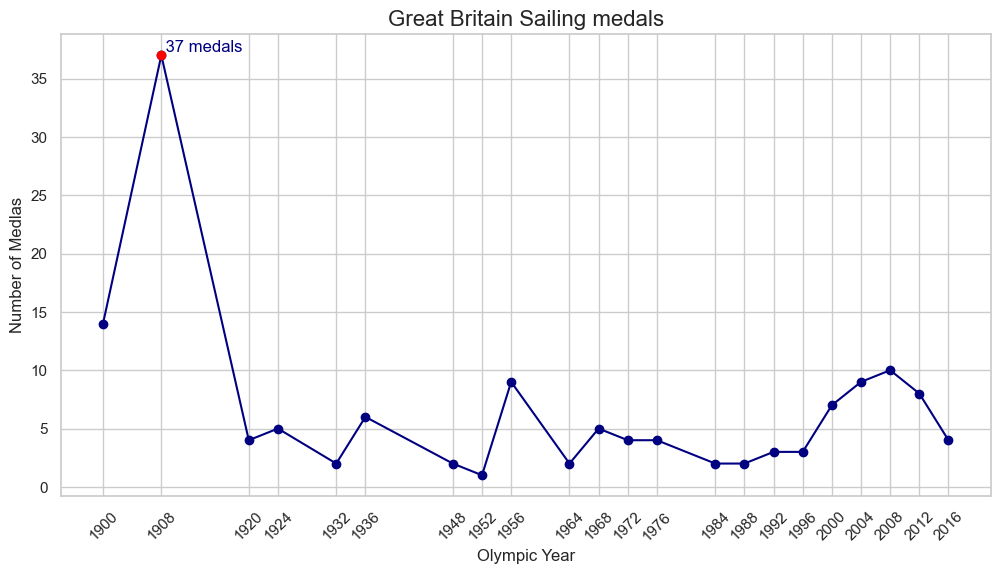

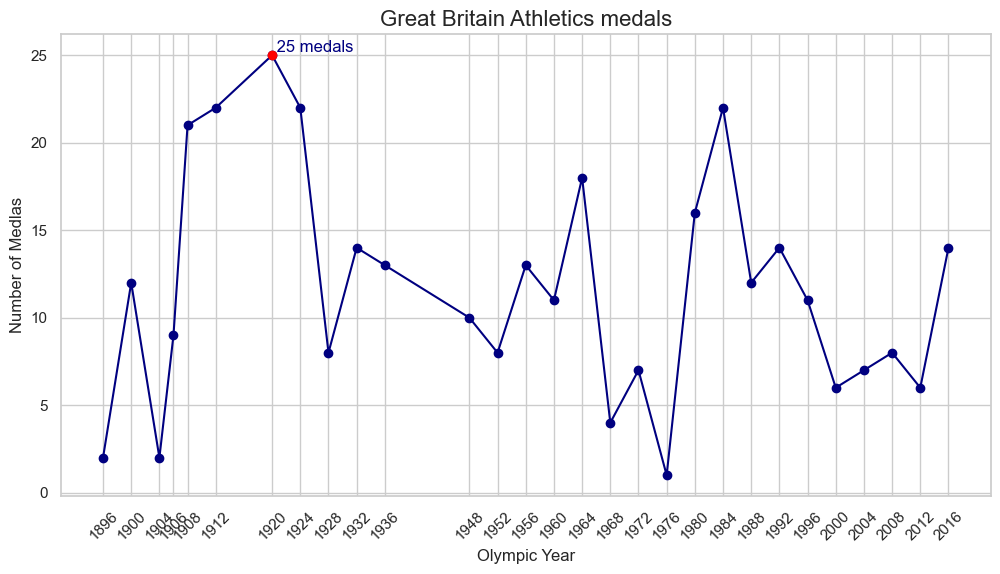

In [37]:
sns.set(style="whitegrid")

# Rowing
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_rowing.index, medal_trend_rowing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_rowing[medal_trend_rowing == medal_trend_rowing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='left', color='navy')

plt.title('Great Britain Rowing medals', fontsize=16)
plt.xticks(medal_trend_rowing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

# Cycling
# (ISAK) Göra subplots här!
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_cycling.index, medal_trend_cycling.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_cycling[medal_trend_cycling == medal_trend_cycling.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', horizontalalignment='right', color='navy')

plt.title('Great Britain Cycling medals', fontsize=16)
plt.xticks(medal_trend_cycling.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

# Sailing
plt.figure(figsize=[12, 6])
plt.plot(medal_trend_sailing.index, medal_trend_sailing.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_sailing[medal_trend_sailing == medal_trend_sailing.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', color='navy')

plt.title('Great Britain Sailing medals', fontsize=16)
plt.xticks(medal_trend_sailing.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()


plt.figure(figsize=[12, 6])
plt.plot(medal_trend_athletics.index, medal_trend_athletics.values, marker='o', color='navy', linestyle='-')

peak_years = medal_trend_athletics[medal_trend_athletics == medal_trend_athletics.max()]
plt.scatter(peak_years.index, peak_years.values, color='red', zorder=5)

for year, medals in peak_years.items():
    plt.text(year, medals, f' {medals} medals', verticalalignment='bottom', color='navy')

plt.title('Great Britain Athletics medals', fontsize=16)
plt.xticks(medal_trend_athletics.index)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medlas', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout

plt.show()

In [38]:
# Liten px graf för sammanställning, väldigt ofärdig.
px.bar(medal_trend_df, title=f"Medal trend for {', '.join(medal_trend_df.columns)}")

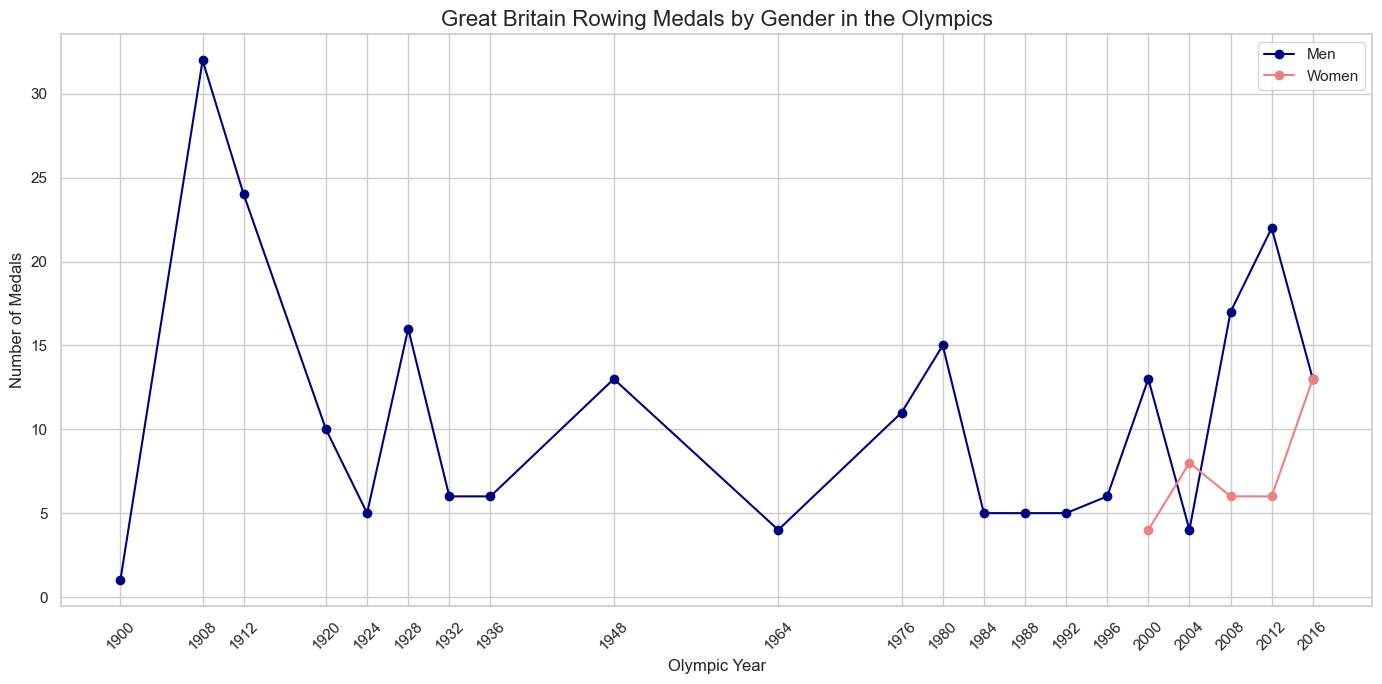

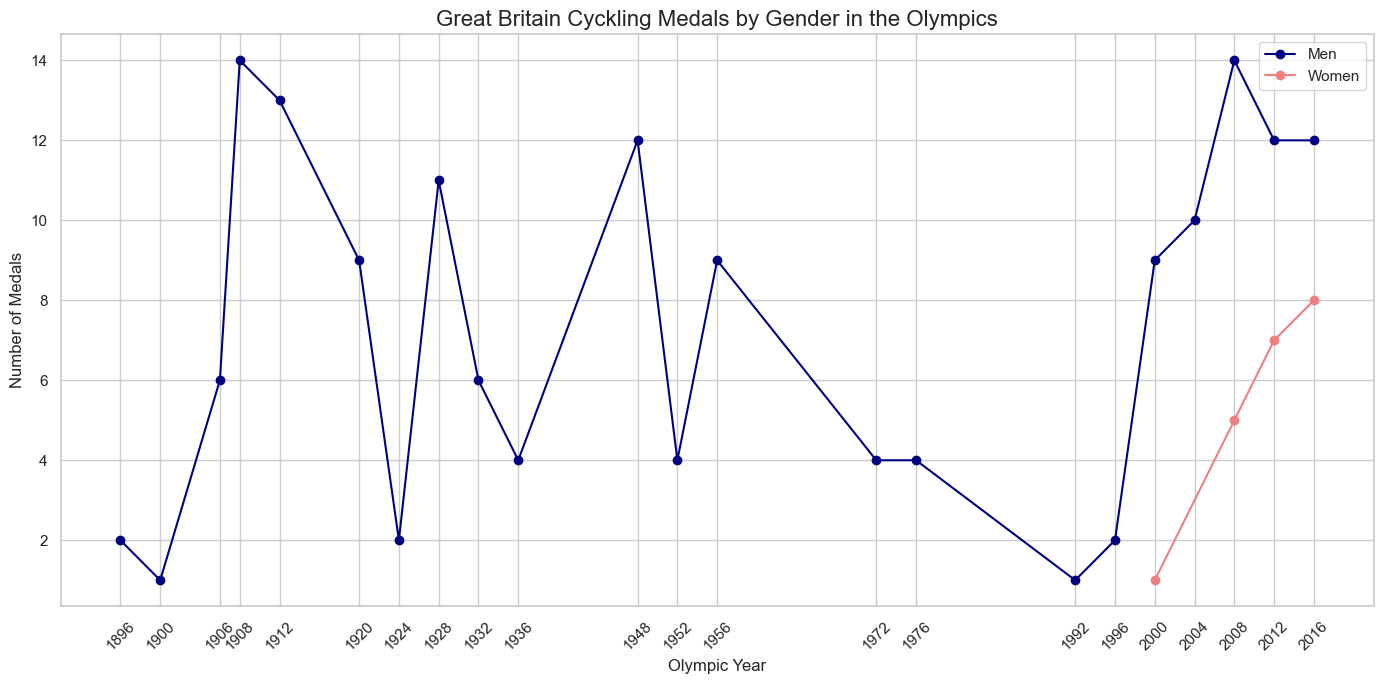

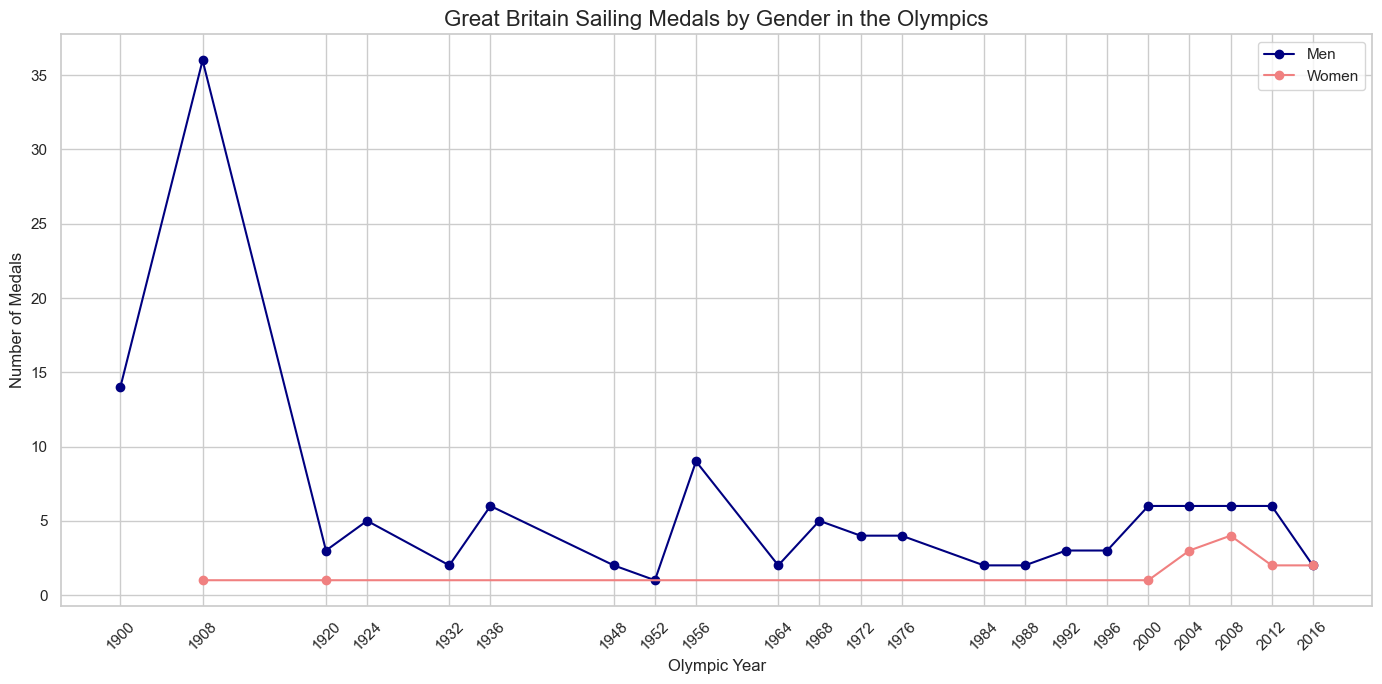

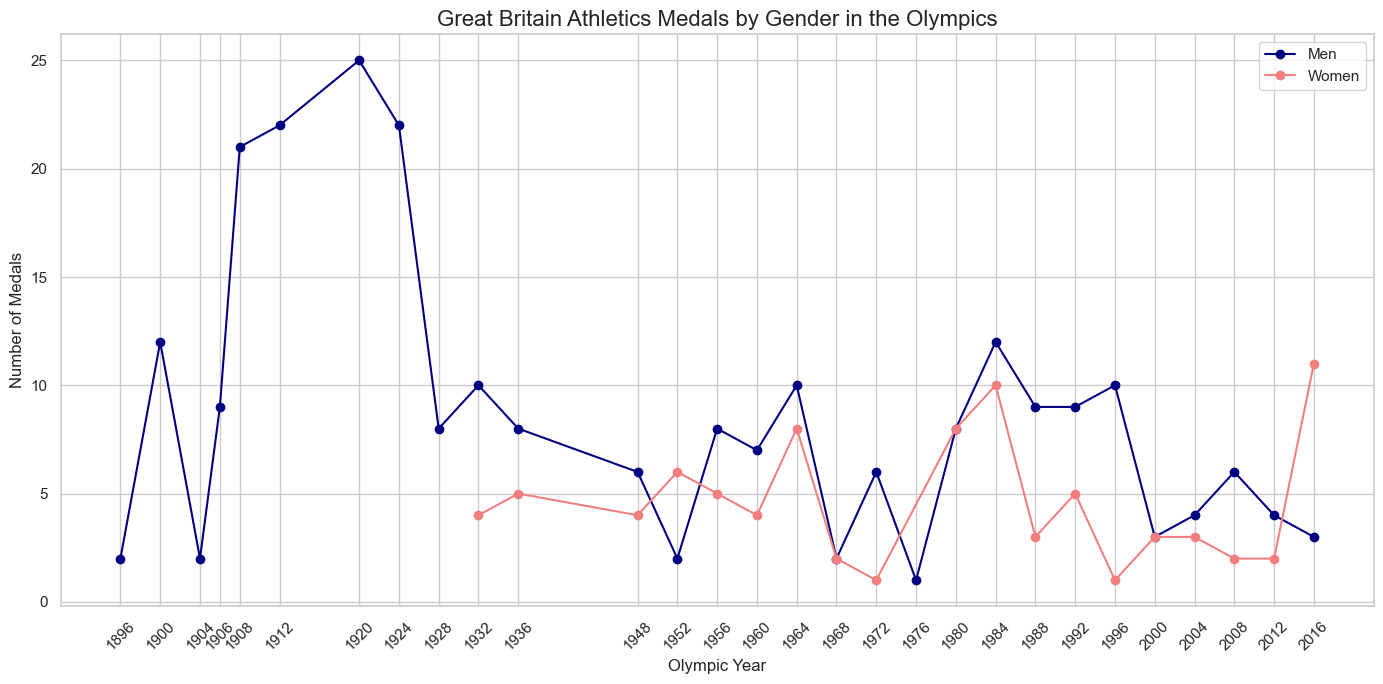

In [36]:
# Rowing
gb_rowing_men = gb_rowing[(gb_rowing['Sex'] == 'M') & gb_rowing['Medal'].notna()]
gb_rowing_women = gb_rowing[(gb_rowing['Sex'] == 'F') & gb_rowing['Medal'].notna()]

medal_trend_rowing_men = gb_rowing_men.groupby('Year')['Medal'].count()
medal_trend_rowing_women = gb_rowing_women.groupby('Year')['Medal'].count()

plt.figure(figsize=(14, 7))
plt.plot(medal_trend_rowing_men.index, medal_trend_rowing_men.values, color='navy', label='Men', marker='o')
plt.plot(medal_trend_rowing_women.index, medal_trend_rowing_women.values, color='#F08080', label='Women', marker='o')

plt.title('Great Britain Rowing Medals by Gender in the Olympics', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.xticks(medal_trend_rowing.index)

plt.show()

# Cycling
gb_cycling_men = gb_cycling[(gb_cycling['Sex'] == 'M') & gb_cycling['Medal'].notna()]
gb_cycling_women = gb_cycling[(gb_cycling['Sex'] == 'F') & gb_cycling['Medal'].notna()]

gb_cycling_men_medals = gb_cycling_men.groupby('Year')['Medal'].count()
gb_cycling_women_medals = gb_cycling_women.groupby('Year')['Medal'].count()

plt.figure(figsize=(14, 7))
plt.plot(gb_cycling_men_medals.index, gb_cycling_men_medals.values, color='navy', label='Men', marker='o')
plt.plot(gb_cycling_women_medals.index, gb_cycling_women_medals.values, color='#F08080', label='Women', marker='o')

plt.title('Great Britain Cyckling Medals by Gender in the Olympics', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.xticks(medal_trend_cycling.index)

plt.show()

# Sailing
gb_sailing_men = gb_sailing[(gb_sailing['Sex'] == 'M') & gb_sailing['Medal'].notna()]
gb_sailing_women = gb_sailing[(gb_sailing['Sex'] == 'F') & gb_sailing['Medal'].notna()]

gb_sailing_men_medals = gb_sailing_men.groupby('Year')['Medal'].count()
gb_sailing_women_medals = gb_sailing_women.groupby('Year')['Medal'].count()

plt.figure(figsize=(14, 7))
plt.plot(gb_sailing_men_medals.index, gb_sailing_men_medals.values, color='navy', label='Men', marker='o')
plt.plot(gb_sailing_women_medals.index, gb_sailing_women_medals.values, color='#F08080', label='Women', marker='o')

plt.title('Great Britain Sailing Medals by Gender in the Olympics', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.xticks(medal_trend_sailing.index)

plt.show()

# Athletics
gb_athletics_men = gb_athletics[(gb_athletics['Sex'] == 'M') & gb_athletics['Medal'].notna()]
gb_athletics_women = gb_athletics[(gb_athletics['Sex'] == 'F') & gb_athletics['Medal'].notna()]

gb_athletics_men_medals = gb_athletics_men.groupby('Year')['Medal'].count()
gb_athletics_women_medals = gb_athletics_women.groupby('Year')['Medal'].count()

plt.figure(figsize=(14, 7))
plt.plot(gb_athletics_men_medals.index, gb_athletics_men_medals.values, color='navy', label='Men', marker='o')
plt.plot(gb_athletics_women_medals.index, gb_athletics_women_medals.values, color='#F08080', label='Women', marker='o')

plt.title('Great Britain Athletics Medals by Gender in the Olympics', fontsize=16)
plt.xlabel('Olympic Year', fontsize=12)
plt.ylabel('Number of Medals', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.xticks(medal_trend_athletics.index)

plt.show()

In [39]:
# medal_summary = pd.DataFrame(coumns=['Sport', 'Gender', 'Gold', 'Silver', 'Bronze', 'Total'])
medal_summary = []
sports = ['Cycling', 'Rowing', 'Sailing', 'Athletics']

for sport in sports:
    sport_data = gb_athletes[gb_athletes['Sport'] == sport]

    for gender in ['M', 'F']:
        medals = sport_data[sport_data['Sex'] == gender]['Medal'].value_counts()

        dict = {
            'Sport': sport,
            'Gender': 'Men' if gender == 'M' else 'Women',
            'Gold': medals.get('Gold', 0),
            'Silver': medals.get('Silver', 0),
            'Bronze': medals.get('Bronze', 0),
            'Total': medals.sum() 
        }

        medal_summary.append(dict)
        
medal_summary_df = pd.DataFrame(medal_summary)
medal_summary_df


,Sport,Gender,Gold,Silver,Bronze,Total
0,Cycling,Men,46,62,53,161
1,Cycling,Women,13,6,2,21
2,Rowing,Men,101,94,38,233
3,Rowing,Women,8,25,4,37
4,Sailing,Men,60,46,23,129
5,Sailing,Women,11,2,1,14
6,Athletics,Men,68,105,78,251
7,Athletics,Women,10,28,49,87


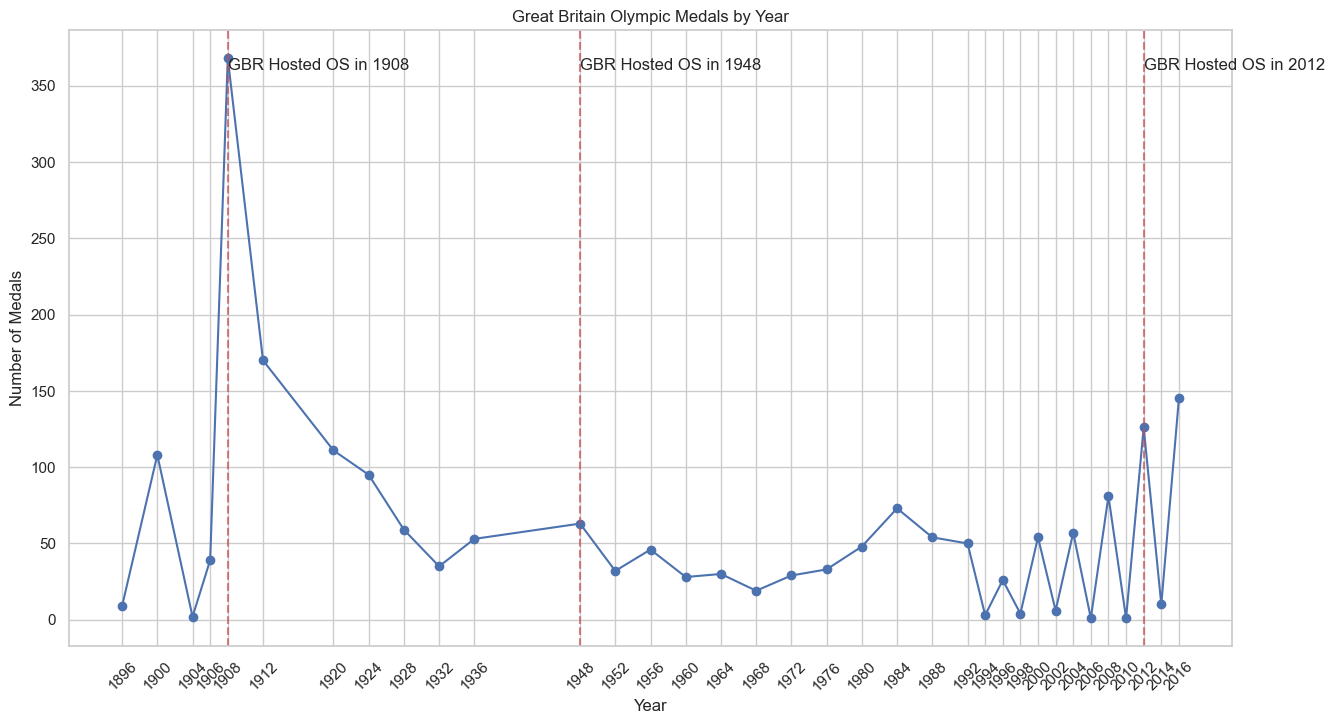

In [53]:
medlas_per_year = gb_athletes.dropna(subset=['Medal']).groupby('Year').size()

plt.figure(figsize=(15, 8))
plt.plot(medlas_per_year.index, medlas_per_year.values, marker='o')

host_years = [1908, 1948, 2012]
for year in host_years:
    plt.axvline(x=year, color='r', linestyle='--', alpha=0.7)

for year in host_years:
    plt.text(year, max(medlas_per_year.values), f'GBR Hosted OS in {year}', verticalalignment='top', horizontalalignment='left')

plt.title('Great Britain Olympic Medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.xticks(medlas_per_year.index)
plt.show()